In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

#  matplotlib.style.use('ggplot')
%matplotlib inline

In [33]:
hotel = pd.read_csv('Chicago_hotels.csv', sep=';', decimal=",")
hotel.head()

,date1,date2,x1,x2,x3,x4
0,January,1994,"44,3","104,04","51,9","72,15"
1,February,1994,"54,7","102,74","60,1","73,47"
2,March,1994,"61,9","105,23",65,"74,91"
3,April,1994,"69,1","113,63","69,8","79,06"
4,May,1994,"70,8","120,77","72,4","82,07"


Моя задача: предсказать коэффициент загрузки гостиниц (в процентах) на 8 месяцев вперед (столбец x1). Так как у меня не получилось заменить ',' на '.' (почему-то возникали странные ошибки для разных вариантов замены), я создала файл с расширением xlsx, куда скопировала только нужный нам столбец.

In [34]:
hotel = pd.read_excel('data.xlsx')
hotel.head()

,x1
0,44.3
1,54.7
2,61.9
3,69.1
4,70.8


In [35]:
len(hotel)

112

Text(0, 0.5, 'Процент загрузки')

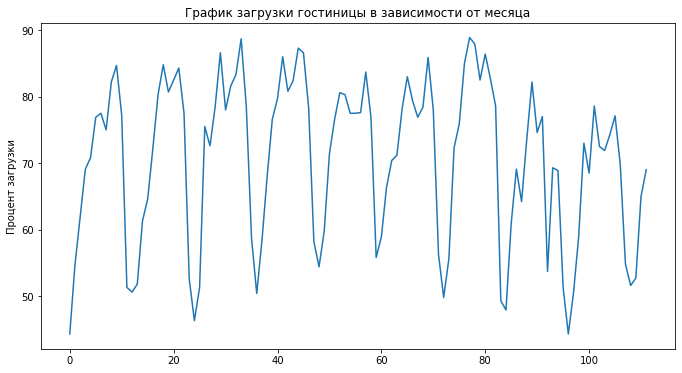

In [106]:
fig = plt.figure(figsize=(25, 6))
ax1 = fig.add_subplot(121)
hotel['x1'].plot(ax=ax1)
ax1.set_title(u'График загрузки гостиницы в зависимости от месяца')
ax1.set_ylabel(u'Процент загрузки')

Тип тренда больше похож на линейный (хотя можно увидеть и волнообразный). Характер сезонности - аддитивный (хотя тоже, если присмотреться - можно увидеть мультипликативность). Сезонность - 12 месяцев (это хорошо видно на графике).

Вывод: будем прогнозировать процент загрузки с помощью модели линейной регрессии. 

In [58]:
# Добавим столбец с номерами месяцев
hotel['month_num'] = range(1, len(hotel) + 1)

# И месяцы 
hotel["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*10)[0:len(hotel)]
hotel["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0]*10)[0:len(hotel)]
hotel["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0]*10)[0:len(hotel)]
hotel["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0]*10)[0:len(hotel)]
hotel["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0]*10)[0:len(hotel)]
hotel["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0]*10)[0:len(hotel)]
hotel["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0]*10)[0:len(hotel)]
hotel["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0]*10)[0:len(hotel)]
hotel["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0]*10)[0:len(hotel)]
hotel["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0]*10)[0:len(hotel)]
hotel["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0]*10)[0:len(hotel)]
hotel["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1]*10)[0:len(hotel)]

hotel.head(14)

,x1,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,44.3,1,1,0,0,0,0,0,0,0,0,0,0,0
1,54.7,2,0,1,0,0,0,0,0,0,0,0,0,0
2,61.9,3,0,0,1,0,0,0,0,0,0,0,0,0
3,69.1,4,0,0,0,1,0,0,0,0,0,0,0,0
4,70.8,5,0,0,0,0,1,0,0,0,0,0,0,0
5,76.9,6,0,0,0,0,0,1,0,0,0,0,0,0
6,77.5,7,0,0,0,0,0,0,1,0,0,0,0,0
7,75.0,8,0,0,0,0,0,0,0,1,0,0,0,0
8,82.2,9,0,0,0,0,0,0,0,0,1,0,0,0
9,84.7,10,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
# Х - матрица предикторов.
# Убираем из нее x1 и столбец индикаторов базового месяца
# я взяла первый - месяц минимальных продаж - вообще  можно взять любой
X = hotel.drop(columns=["x1", "m01"])

#  Y - столбец откликов.
y = hotel['x1']

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [65]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,51.476517
1,month_num,-0.029573
2,m02,6.379573
3,m03,17.589146
4,m04,21.518719
5,m05,26.435298
6,m06,32.653760
7,m07,29.372222
8,m08,28.568462
9,m09,28.620257


Text(0, 0.5, 'Процент загрузки')

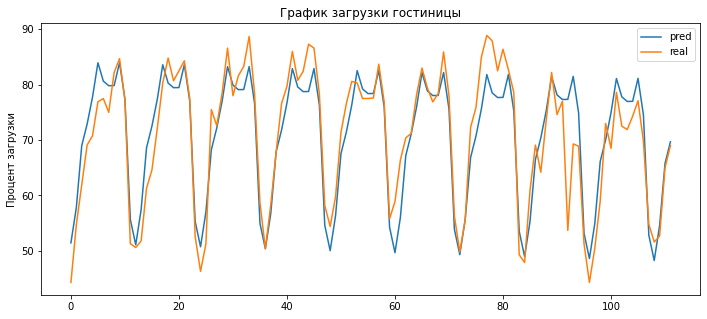

In [108]:
pred = pd.DataFrame({'pred': model.predict(X),'real': y})
fig = plt.figure(figsize=(26, 5))
ax1 = fig.add_subplot(121)
pred.plot(ax=ax1)
ax1.set_title(u'График загрузки гостиницы')
ax1.set_ylabel(u'Процент загрузки')

Видны не сильно значимые отклонения в первых месяцах и в окресности 80-ого. Это как раз из-за нечетко выраженного линейного типа тренда (мы-то предположили, что он линейный).

In [73]:
#  Готовим матрицу значений предикторов hotel_fix
hotel_fit = pd.DataFrame()
hotel_fit['month_num'] = range(len(hotel)+1, len(hotel)+9)


#  Добавляем индикаторы месяцев. Базового месяца снова не должно быть
hotel_fit["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0])[0: 8 ]
hotel_fit["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0])[0: 8 ]
hotel_fit["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0])[0: 8 ]
hotel_fit["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0])[0: 8 ]
hotel_fit["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0])[0: 8 ]
hotel_fit["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0])[0: 8 ]
hotel_fit["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0])[0: 8 ]
hotel_fit["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0])[0: 8 ]
hotel_fit["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0])[0: 8 ]
hotel_fit["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0])[0: 8 ]
hotel_fit["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1])[0: 8 ]

hotel_fit

,month_num,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,113,0,0,0,0,0,0,0,0,0,0,0
1,114,1,0,0,0,0,0,0,0,0,0,0
2,115,0,1,0,0,0,0,0,0,0,0,0
3,116,0,0,1,0,0,0,0,0,0,0,0
4,117,0,0,0,1,0,0,0,0,0,0,0
5,118,0,0,0,0,1,0,0,0,0,0,0
6,119,0,0,0,0,0,1,0,0,0,0,0
7,120,0,0,0,0,0,0,1,0,0,0,0


In [89]:
#  Прогноз для исходного ряда
y1 = model.predict(hotel_fit)
y1

array([48.13476337, 54.48476337, 65.66476337, 69.56476337, 74.45176955,
       80.64065844, 77.32954733, 76.49621399])

Построим график с прогнозом

In [90]:
#  матрица с подгонкой
pred['forecast'] = np.nan
pred.head()

,pred,real,forecast
0,51.446944,44.3,NaN
1,57.796944,54.7,NaN
2,68.976944,61.9,NaN
3,72.876944,69.1,NaN
4,77.763951,70.8,NaN


In [93]:
#  Продолжение предыдущей матрицы.
#  Для этих месяцев есть спрогнозированные значения, но нет исторических и подгонки.

#  Имена столбцов должны быть как в матрице pred ранее

pred_2 = pd.DataFrame(model.predict(hotel_fit), columns=['forecast'])
pred_2['real'] = np.nan
pred_2['pred'] = np.nan

pred_2.head()

,forecast,real,pred
0,48.134763,NaN,NaN
1,54.484763,NaN,NaN
2,65.664763,NaN,NaN
3,69.564763,NaN,NaN
4,74.451770,NaN,NaN


Text(0, 0.5, 'Процент загрузки')

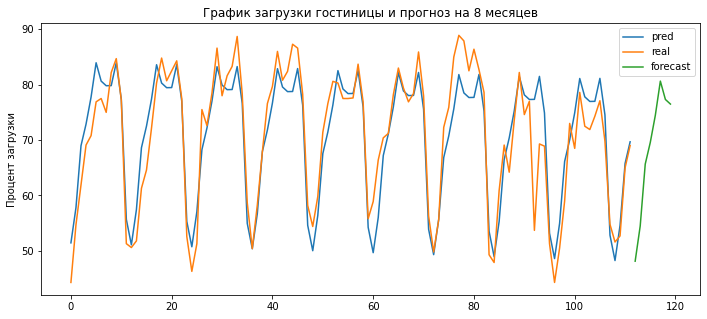

In [102]:
fig = plt.figure(figsize=(26, 5))
ax1 = fig.add_subplot(121)
pred_3.plot(ax=ax1)
ax1.set_title(u'График загрузки гостиницы и прогноз на 8 месяцев')
ax1.set_ylabel(u'Процент загрузки')

Зеленым цветом обозначается прогноз. Прогноз кажется неплохим.